## Learning Data Visualization using SEABORN

- Seaborn is a statistical plotting library
- It has statistical graphs like distribution plots, heatmap, etc
- It has a variety of graph styles
- It works with consonance with PANDAS and MATPLOTLIB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to display the graphs below the cells
sns.set_style('darkgrid')

In [2]:
tips = sns.load_dataset('tips') #seaborn as some inbuilt data sets such as tips, flights, etc

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### Distribution Plot(DIST PLOT)

- Dist plot is used to show the distribution of a univariate set of observations(one variable)

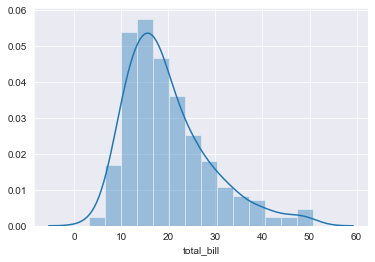

In [7]:
sns.distplot(tips['total_bill'])

##### kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

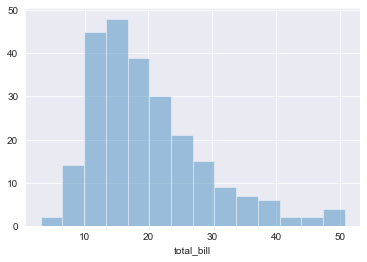

In [8]:
sns.distplot(tips['total_bill'], kde=False)

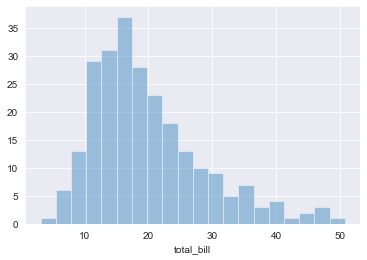

In [9]:
sns.distplot(tips['total_bill'], kde=False, bins = 20)

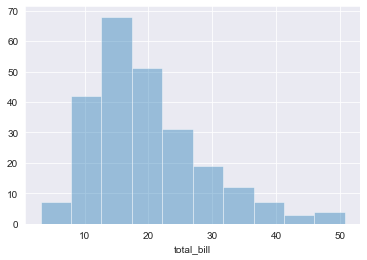

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins = 10)

### JOINTPLOT

- Joint plot is used to show the distribution of a bivariate set of observations (two variables)

- it is basically two Dist Plots created

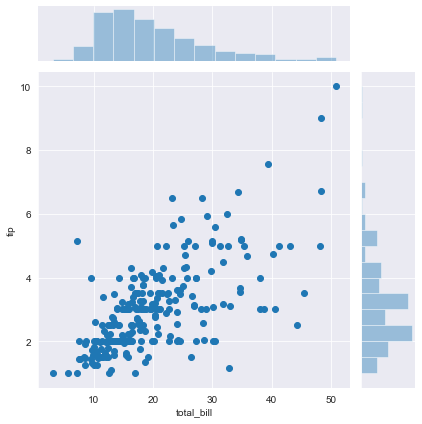

In [11]:
sns.jointplot(x = 'total_bill', y='tip', data = tips)

In [12]:
#above the figure is the dist plot of total_bill and on the right is the dist plot of tip

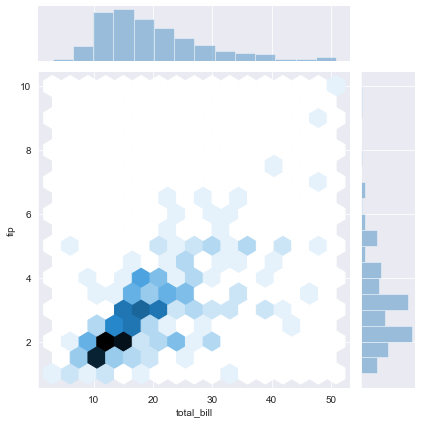

In [13]:
sns.jointplot(x = 'total_bill', y='tip', data = tips, kind='hex') #hexagon chart

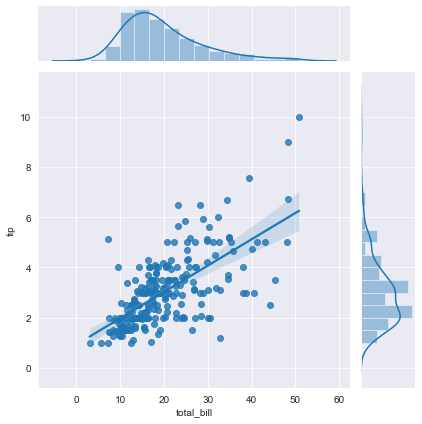

In [14]:
sns.jointplot(x = 'total_bill', y='tip', data = tips, kind='reg') #regression chart

#### PAIRPLOT

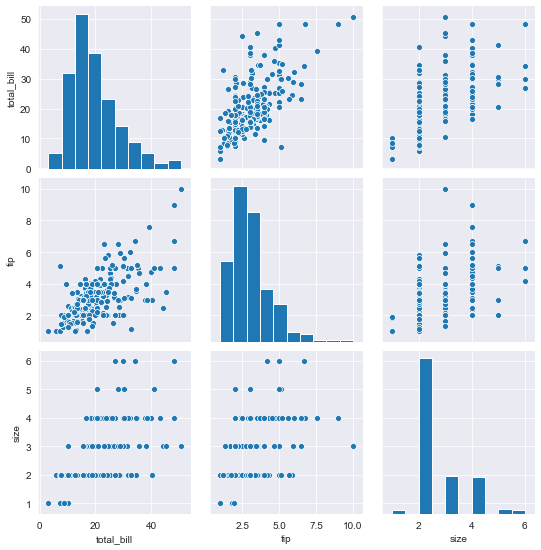

In [15]:
sns.pairplot(tips)

In [16]:
#pairplot plots pairwise relationships accross an entire data frame at least for the numerical columns


Text(0.5, 1.02, 'My First Pairplot')

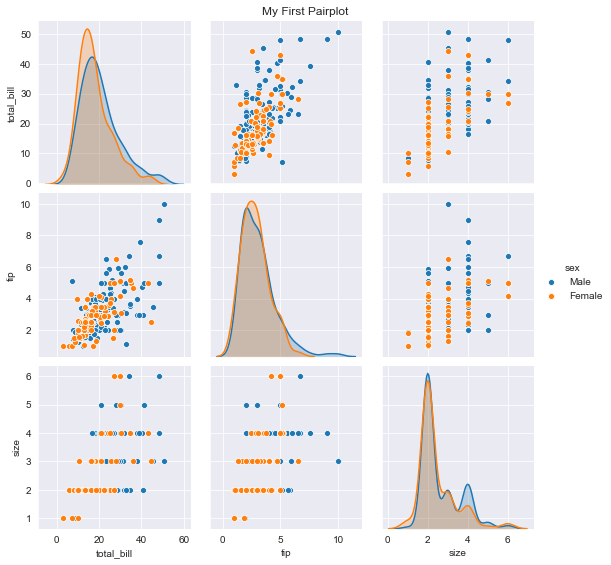

In [17]:
sns.pairplot(tips, hue='sex') #add hue for categorical variable
plt.suptitle(t='My First Pairplot', y=1.02)

In [18]:
#hue plots the same data but divides on the basis of sex

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

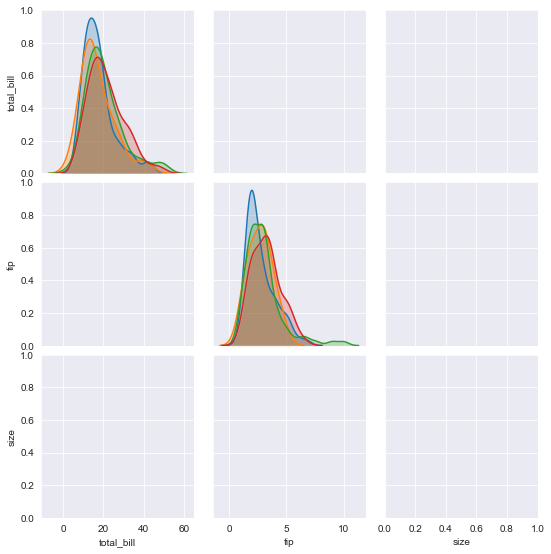

In [19]:
sns.pairplot(tips, hue='day')
plt.suptitle(t='My First Pairplot', y=1.02)

#### Plotting Categorical Data

- BarPlot

#### bar plots is just a general plot that allows you to aggregate the categorical data based off some function and by default that is mean

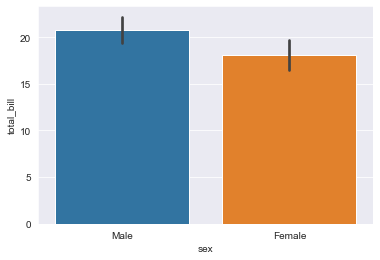

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips) #bar plot needs two value
#one should be categorical and the other should be continuous

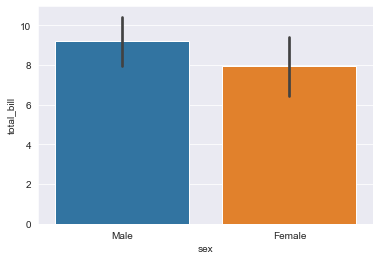

In [21]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std) 
#by default estimator is set to mean but if we want we can change it

In [22]:
#basically the first bar plot shows the avg bill according to the sex and the second bar
#plot showss that the male sex has higher deviation

#### Box Plot

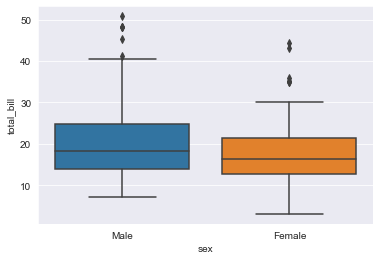

In [23]:
sns.boxplot(x='sex', y='total_bill', data=tips)

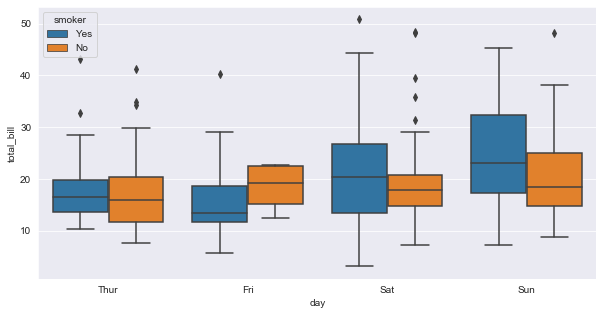

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

In [25]:
#this shows that on sunday, the bill amount of smoker has higher bill amount as compared to friday

#### Violin Plot

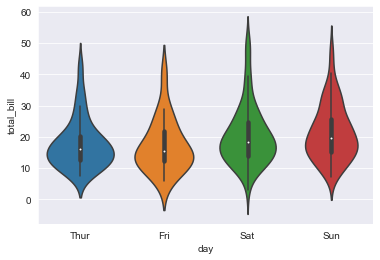

In [26]:
sns.violinplot(x='day', y='total_bill', data=tips)

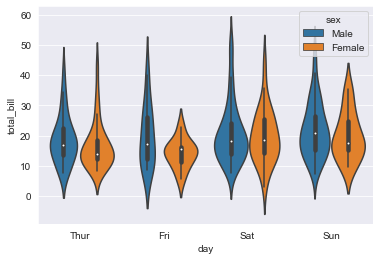

In [27]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

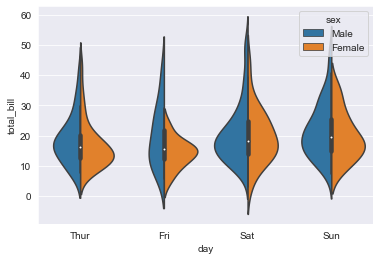

In [28]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split='True')

In [29]:
#split=True divides into hue in one fig

### HeatMap

In [32]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


 - data needs to be in matrix format

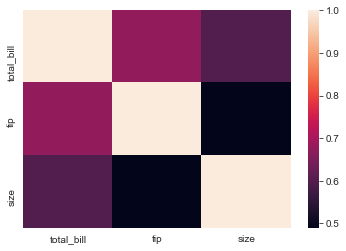

In [35]:
sns.heatmap(tips.corr()) #darkness means high correlation between data and lighter means low correlation

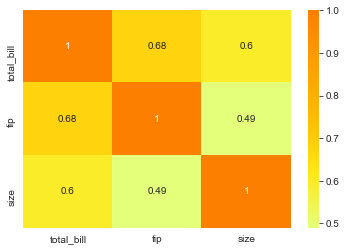

In [37]:
sns.heatmap(tips.corr(), annot=True, cmap='Wistia') #annot gives the values

### FACETGRID

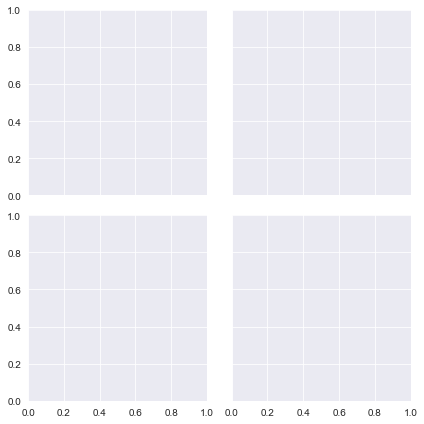

In [40]:
sns.FacetGrid(data=tips, col = 'time', row='smoker') #creates a blank gird

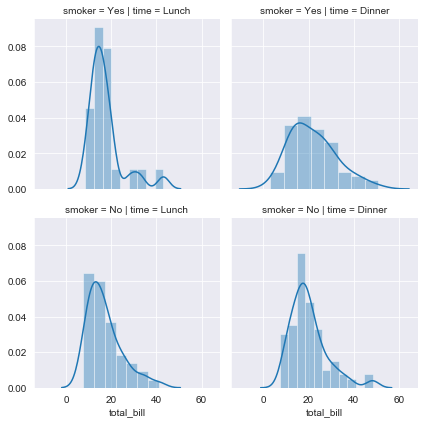

In [42]:
g = sns.FacetGrid(data=tips, col = 'time', row='smoker') #assigning the blank gird plot to a variable
g.map(sns.distplot, 'total_bill') 
#it creates distribution plots of total bill filtered by various values of time and row

In [43]:
#first grid shows a smoker's bill during lunch, the next one shows a smoker's bill during dinner
#first grid shows a non-smoker's bill during lunch, the next one shows a non-smoker's bill during dinner